### Data Preparation

In [769]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [770]:
# Load data
pd.set_option('display.max_columns', None)
data = pd.read_csv("E:\College\cl\data (cl)\house_price\jabodetabek_house_price.csv")
data.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,hos10685867,3.0,3.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,hos10927790,3.0,3.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,hos10785530,4.0,3.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


In [771]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [772]:
missing_values = data.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
certificate              141
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
furnishing               387
dtype: int64


In [773]:
# data.property_condition.value_counts()

In [774]:
# data.facilities.value_counts()

In [775]:
# data.certificate.value_counts()

In [776]:
# data.bedrooms.value_counts()

In [777]:
# data.bathrooms.value_counts()

In [778]:
# data.maid_bedrooms.value_counts()

In [779]:
# data.floors.value_counts()

In [780]:
# data.year_built.value_counts()

In [781]:
# data.furnishing.value_counts()

In [782]:
# data.garages.value_counts()

In [783]:
data.property_type.value_counts()

property_type
rumah    3552
Name: count, dtype: int64

### Data Cleaning

- ganti property type jadi "kost" untuk tittle yang ada kata "kos", "kost", "kontrakan" dan kamarnya lebih dari 15
- hapus data yang property typenya "kost"

drop : title, ads_id, year_built, building_age, building_orientation, garages, property_condition, building_orientation
*property condition dihapus karena value seperti unfurnished, semi furnished, furnished, baru sudah ada di kolom "furnishing" dan value lainnya tidak memiliki parameter yang jelas


In [784]:
# Mengubah 'property_type' menjadi 'kost' untuk baris dengan 'title' yang mengandung 'kos', 'kost', atau 'kontrakan' dan 'bedrooms' lebih dari 15
data.loc[(data['title'].str.contains('kos|kost|kontrakan', case=False)) & (data['bedrooms'] > 15), 'property_type'] = 'kost'
data.loc[(data['title'].str.contains('ruko', case=False)), 'property_type'] = 'ruko'


In [785]:
data.property_type.value_counts()

property_type
rumah    3541
kost        8
ruko        4
Name: count, dtype: int64

In [786]:
# Mengganti nilai bedrooms dengan penjumlahan bedrooms dan maid bedrooms
data['bedrooms'].fillna(0, inplace=True)
data['maid_bedrooms'].fillna(0, inplace=True)

data['bedrooms'] = data['bedrooms'] + data['maid_bedrooms']


In [787]:
data['bedrooms'].isnull().sum()

0

In [788]:
# Mengganti nilai bedrooms dengan penjumlahan bedrooms dan maid bedrooms
data['bathrooms'].fillna(0, inplace=True)
data['maid_bathrooms'].fillna(0, inplace=True)

data['bathrooms'] = data['bathrooms'] + data['maid_bathrooms']


In [789]:
data['bathrooms'].isnull().sum()

0

In [790]:
# Menghapus baris di mana 'land_size_m2' adalah NaN
data = data.dropna(subset=['land_size_m2'])


In [791]:
data['land_size_m2'].isnull().sum()

0

In [792]:
# Menghapus baris di mana 'land_size_m2' adalah NaN
data = data.dropna(subset=['building_size_m2'])

In [793]:
data['building_size_m2'].isnull().sum()

0

In [794]:
data['certificate'].fillna(0, inplace=True)

In [795]:
data['furnishing'].fillna(0, inplace=True)

In [796]:
data.head(1)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,5.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished


In [797]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [798]:
# Mengganti nilai 'facilities' dengan jumlah fasilitas
data['facilities'] = data['facilities'].apply(lambda x: len(x.split(',')))

In [799]:
# Menghilangkan kata 'mah' dalam kolom 'electricity'
data['electricity'] = data['electricity'].str.replace('mah', '')

In [800]:
data

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\r\nLingkungan as...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,4,rumah,hos11360272,4.0,5.0,239.0,272.0,0.0,shm - sertifikat hak milik,4400,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,1,rumah,hos10680347,3.0,2.0,55.0,69.0,1.0,hgb - hak guna bangunan,2200,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,0
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,6,rumah,hos10685867,4.0,4.0,119.0,131.0,1.0,hgb - hak guna bangunan,2200,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,10,rumah,hos10927790,4.0,4.0,180.0,174.0,0.0,shm - sertifikat hak milik,3500,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,5,rumah,hos10785530,5.0,4.0,328.0,196.0,2.0,shm - sertifikat hak milik,3500,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,https://www.rumah123.com/properti/tangerang/ho...,5.880000e+08,Terbaru Cluster Minimalis Sudimara Dekat Stasiun,"Jombang, Tangerang",Jombang,Tangerang,-6.296615,106.704601,10,rumah,hos11361759,2.0,1.0,72.0,36.0,1.0,shm - sertifikat hak milik,1300,0.0,0.0,1.0,0.0,2022.0,baru,NaN,1.0,furnished
3549,https://www.rumah123.com/properti/tangerang/ho...,7.850000e+08,Rumah Modern Asri dan Nyaman Bebas Banjir Loka...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,11,rumah,hos11359615,3.0,2.0,85.0,60.0,1.0,shm - sertifikat hak milik,1300,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3550,https://www.rumah123.com/properti/tangerang/ho...,7.550000e+08,Rumah Mewah Murah 2 Lantai Gratis Biaya Biaya ...,"Lengkong Kulon, Tangerang",Lengkong Kulon,Tangerang,-6.283454,106.638775,7,rumah,hos11359594,3.0,2.0,78.0,60.0,1.0,shm - sertifikat hak milik,1300,0.0,0.0,2.0,0.0,2022.0,baru,utara,0.0,unfurnished
3551,https://www.rumah123.com/properti/tangerang/ho...,8.000000e+08,Rumah 2 Lantai Dekat Perkantoran BSD City AEON...,"BSD Provance Parkland, Tangerang",BSD Provance Parkland,Tangerang,-6.288237,106.665859,6,rumah,hos11359313,3.0,2.0,60.0,65.0,2.0,shm - sertifikat hak milik,2200,0.0,0.0,2.0,0.0,2022.0,baru,selatan,0.0,furnished


encode

In [801]:
# Mengubah data dalam kolom menjadi string
data['certificate'] = data['certificate'].astype(str)
data['furnishing'] = data['furnishing'].astype(str)


In [802]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Dapatkan daftar kolom non-numerik
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

# Lakukan Label Encoding untuk setiap kolom non-numerik
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column])

data.tail()


,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
3548,3330,588000000.0,3235,197,189,8,-6.296615,106.704601,10,2,2855,2.0,1.0,72.0,36.0,1.0,4,4,0.0,0.0,1.0,0.0,2022.0,2,8,1.0,2
3549,3299,785000000.0,2180,242,231,8,-6.283454,106.638775,11,2,2752,3.0,2.0,85.0,60.0,1.0,4,4,0.0,0.0,2.0,0.0,2022.0,2,7,0.0,4
3550,3297,755000000.0,2026,242,231,8,-6.283454,106.638775,7,2,2750,3.0,2.0,78.0,60.0,1.0,4,4,0.0,0.0,2.0,0.0,2022.0,2,7,0.0,4
3551,3291,800000000.0,1047,20,21,8,-6.288237,106.665859,6,2,2739,3.0,2.0,60.0,65.0,2.0,4,10,0.0,0.0,2.0,0.0,2022.0,2,3,0.0,2
3552,3285,655000000.0,1063,349,338,8,-6.296963,106.710635,15,2,2729,3.0,2.0,64.0,60.0,1.0,4,4,0.0,0.0,2.0,0.0,2022.0,2,5,2.0,3


<Axes: >

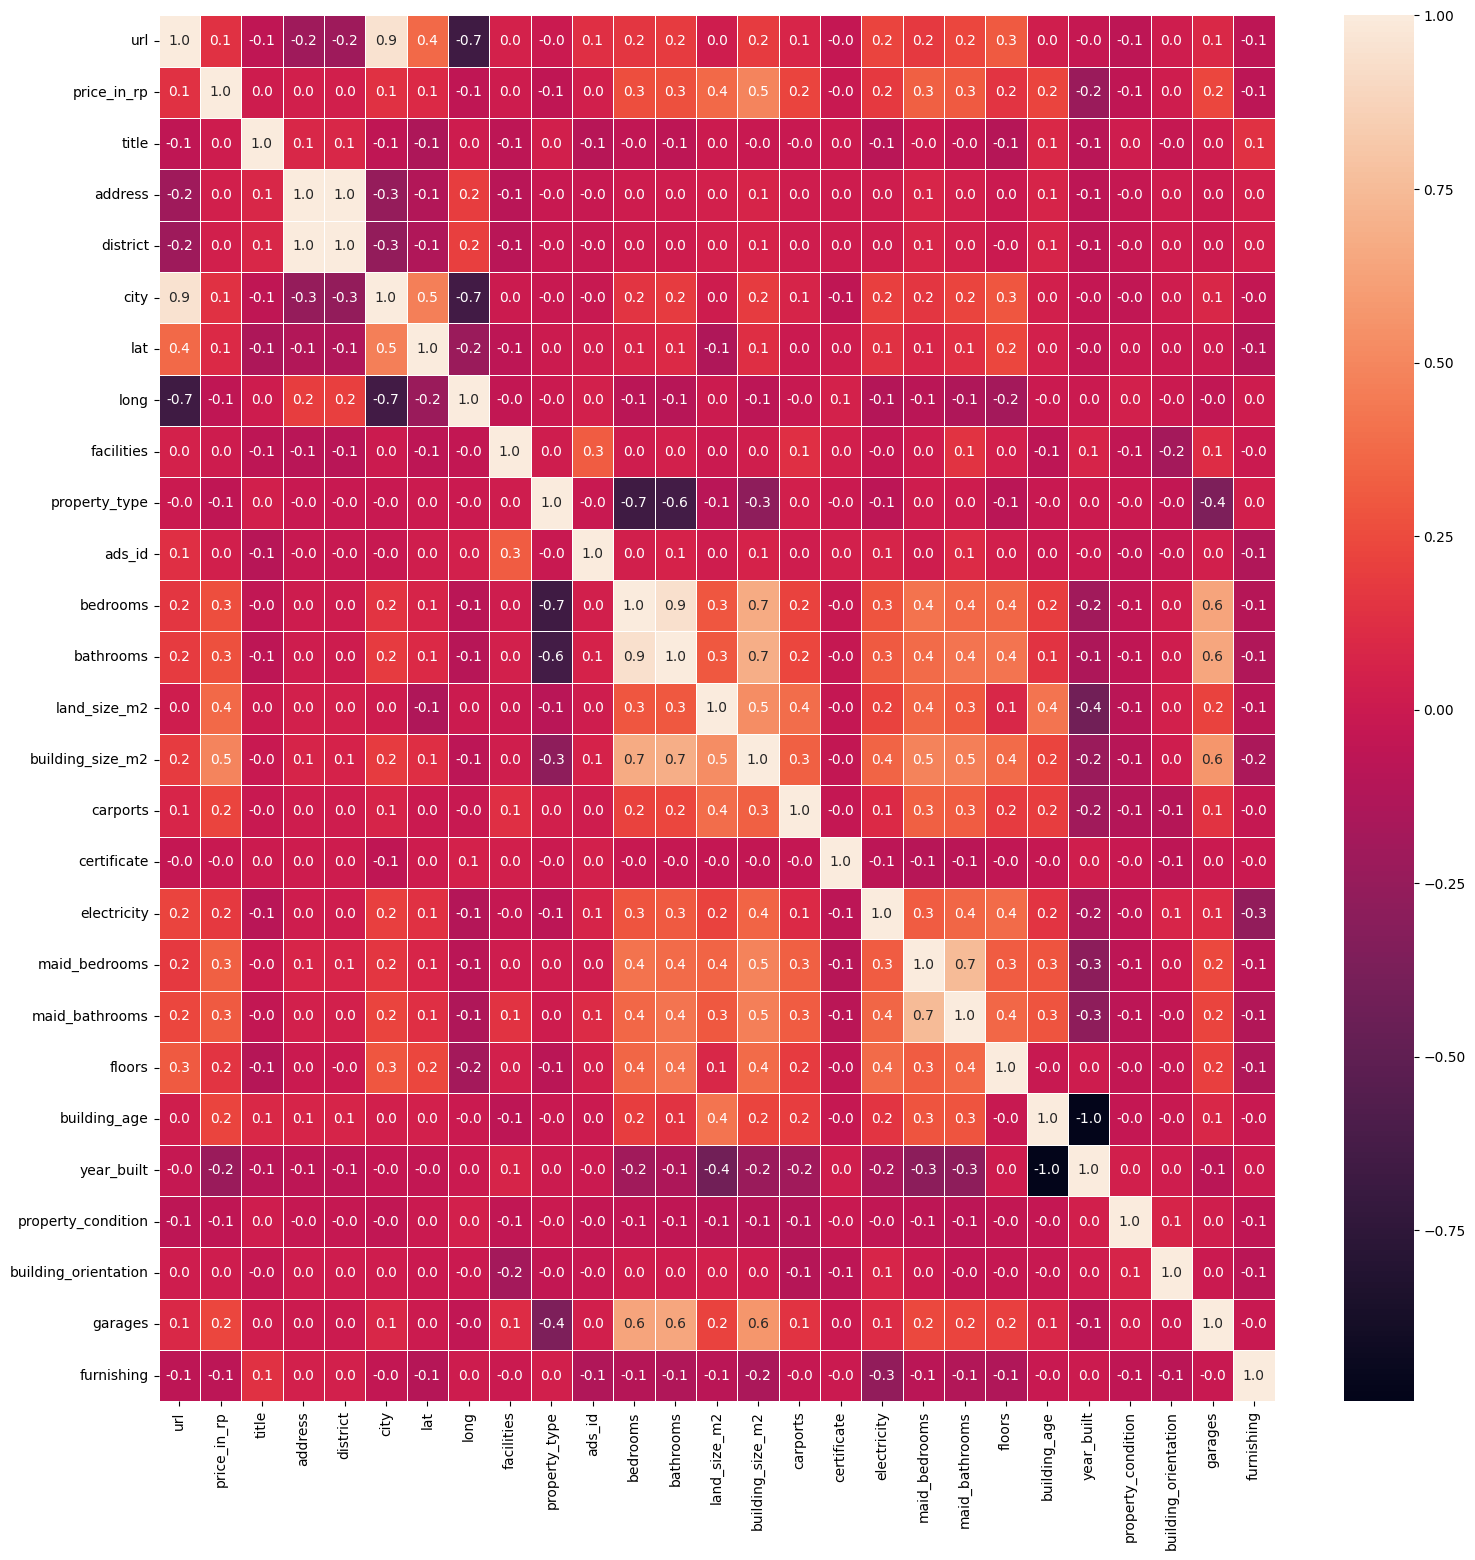

In [803]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Choosing Features

In [804]:
# Hitung matriks korelasi
corr_matrix = data.corr()

# Dapatkan rata-rata korelasi dengan 'price_in_rp'
avg_corr = corr_matrix['price_in_rp'].mean()

# Dapatkan daftar kolom yang memiliki korelasi dengan 'price_in_rp' di atas rata-rata
cols_to_drop = corr_matrix.loc[(corr_matrix['price_in_rp'] < avg_corr) & 
                               (corr_matrix.index != 'price_in_rp') & 
                               (corr_matrix.index != 'long') & 
                               (corr_matrix.index != 'lat')].index

# Hapus kolom tersebut dari DataFrame
data = data.drop(cols_to_drop, axis=1)


In [805]:
avg_corr

0.1529430386628487

<Axes: >

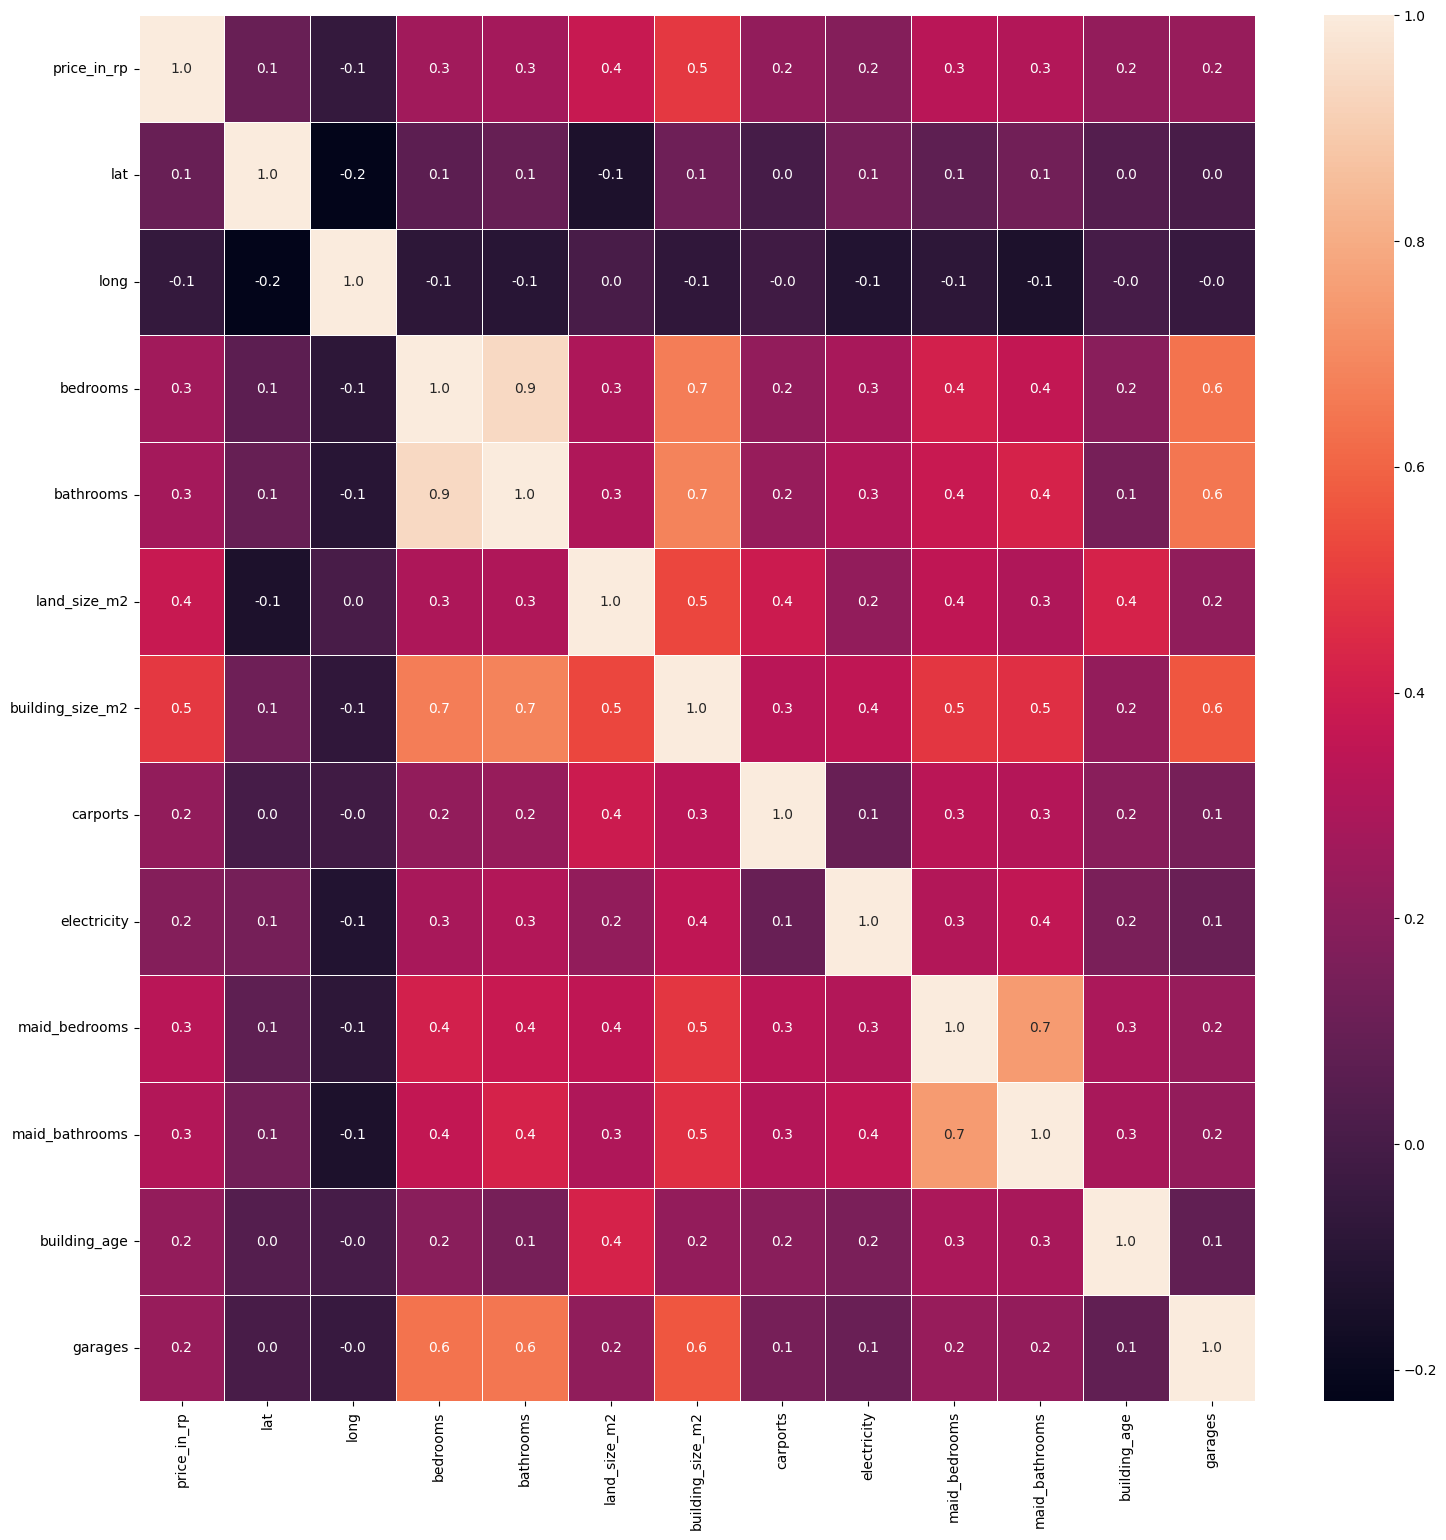

In [806]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Data Transformation

### Exploratory Data Analysis

### Feature Engineering

### Modeling

### Evaluation